In [135]:
import pandas as pd
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go

import statsmodels.api as sm

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

In [136]:
performance = pd.read_csv('./advertising_performance.csv')
advertisers = pd.read_csv('./advertisers.csv')
source = pd.read_csv('./source_channels.csv')

In [137]:
performance_source = pd.merge(performance, source, on= 'source_channel_id')

In [138]:
df = pd.merge(performance_source, advertisers, on='advertiser_id')

In [139]:
df = df.drop(['advertisement_id','advertiser_id','source_channel_id','total_weeks_advertising_with_vice'],axis =1)

In [140]:
df = df.drop(836,axis = 0) # outlier

In [141]:
df = df.drop(921,axis = 0) # outlier

In [143]:
rank = df.sort_values('website_ad_rank')
rank = df.groupby('website_ad_rank').sum().reset_index()
rank['cost_per_impression'] = rank['total_ad_spend']/rank['ad_impressions']
rank['cost_per_click'] = rank['total_ad_spend']/rank['ad_clicks']
rank['cost_per_conversion'] = rank['total_ad_spend']/rank['ad_conversions']
rank['click_through_rate'] = rank['ad_clicks']/rank['ad_impressions']
rank['click_to_conversion'] = rank['ad_conversions']/rank['ad_clicks']

In [144]:
cols = ['ad_impressions',
 'ad_clicks',
 'ad_conversions',
 'total_ad_spend',
'cost_per_impression',
 'cost_per_click',
 'cost_per_conversion',
 'click_through_rate',
 'click_to_conversion']

AxesSubplot(0.125,0.125;0.775x0.755)


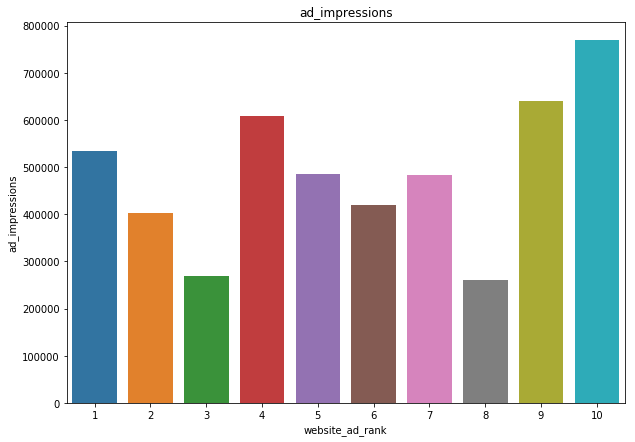

AxesSubplot(0.125,0.125;0.775x0.755)


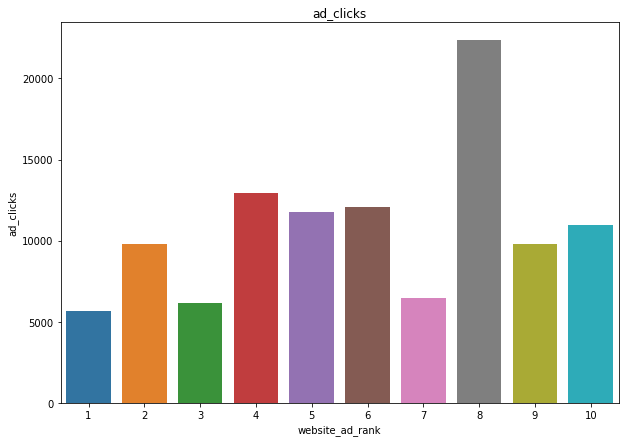

AxesSubplot(0.125,0.125;0.775x0.755)


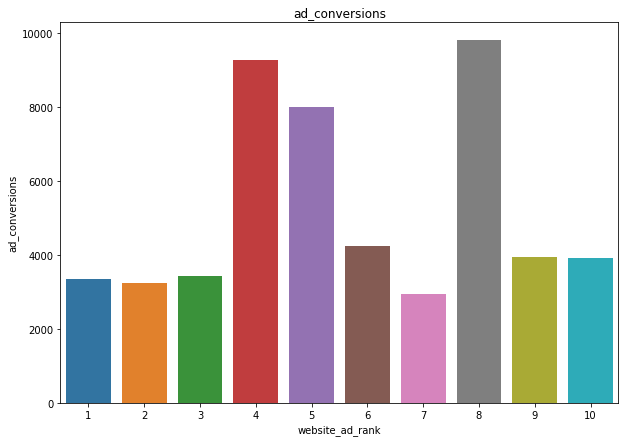

AxesSubplot(0.125,0.125;0.775x0.755)


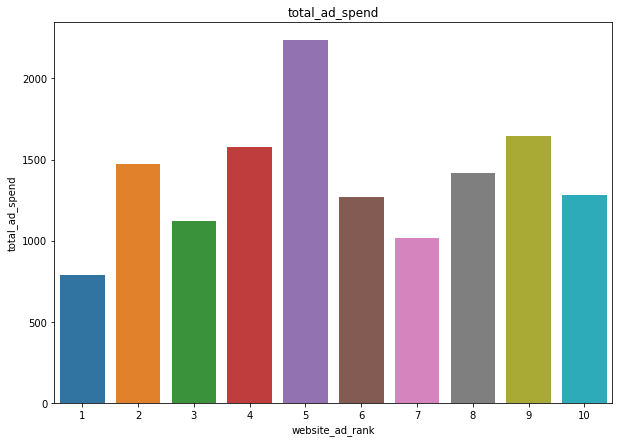

AxesSubplot(0.125,0.125;0.775x0.755)


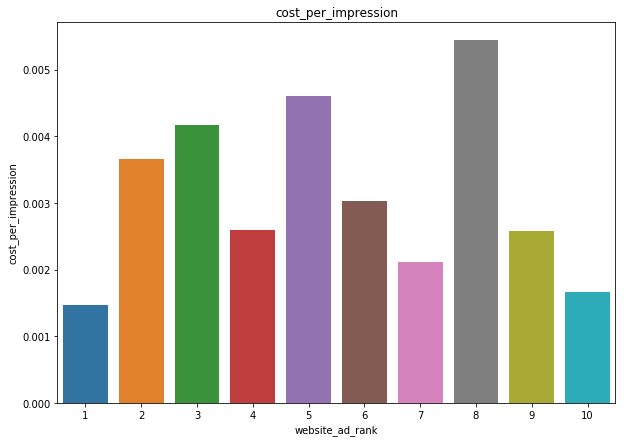

AxesSubplot(0.125,0.125;0.775x0.755)


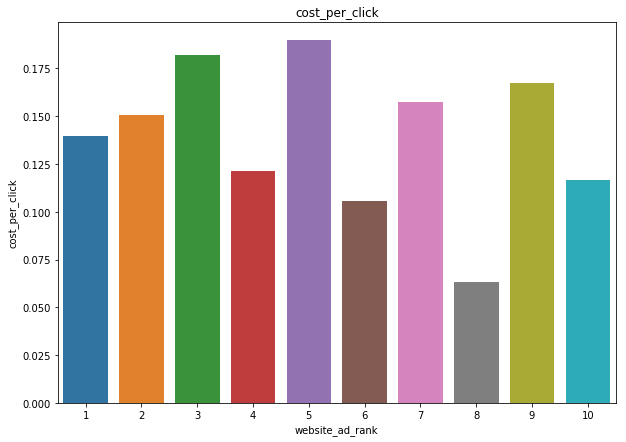

AxesSubplot(0.125,0.125;0.775x0.755)


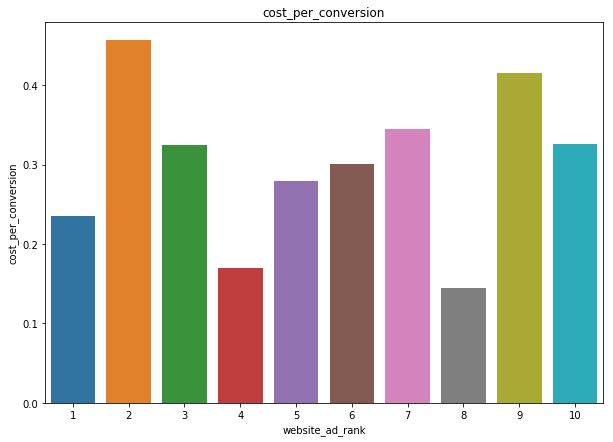

AxesSubplot(0.125,0.125;0.775x0.755)


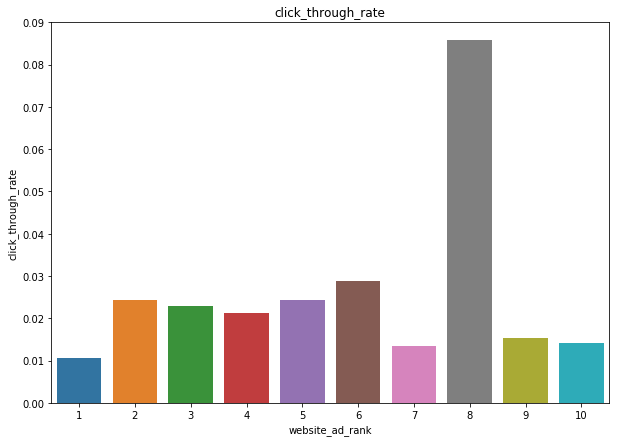

AxesSubplot(0.125,0.125;0.775x0.755)


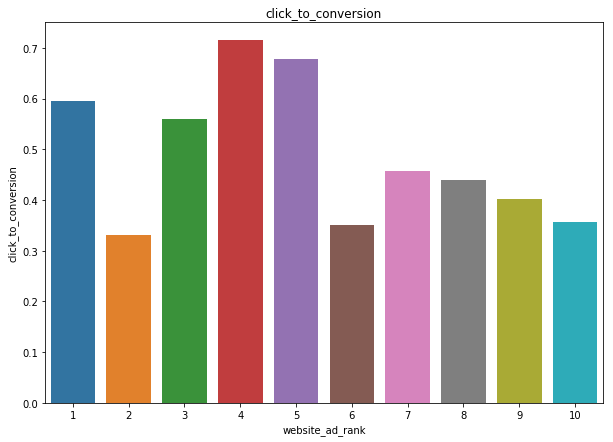

In [145]:
for i in cols:
    print(sns.barplot(x = 'website_ad_rank', y = i, data = rank.sort_values(i)))
    plt.title(i)
    plt.show()

In [146]:
channel = df.groupby('channel_name').sum().reset_index()
channel['cost_per_impression'] = channel['total_ad_spend']/channel['ad_impressions']
channel['cost_per_click'] = channel['total_ad_spend']/channel['ad_clicks']
channel['cost_per_conversion'] = channel['total_ad_spend']/channel['ad_conversions']
channel['click_through_rate'] = channel['ad_clicks']/channel['ad_impressions']
channel['click_to_conversion'] = channel['ad_conversions']/channel['ad_clicks']

AxesSubplot(0.125,0.125;0.775x0.755)


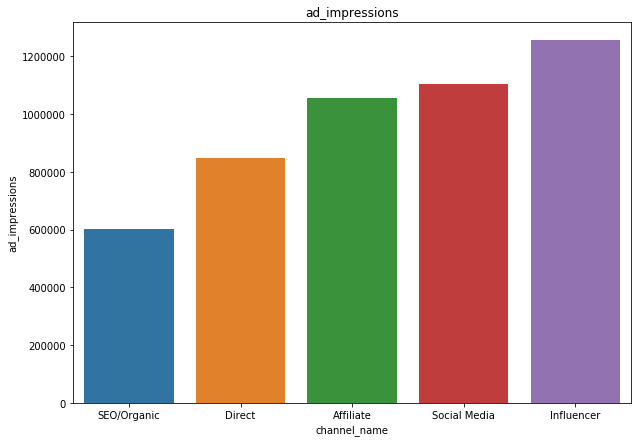

AxesSubplot(0.125,0.125;0.775x0.755)


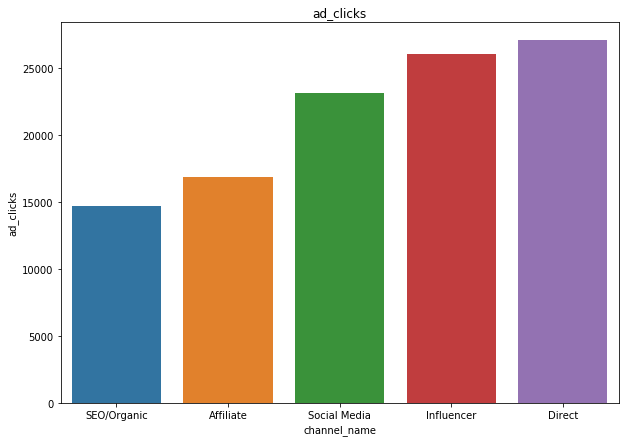

AxesSubplot(0.125,0.125;0.775x0.755)


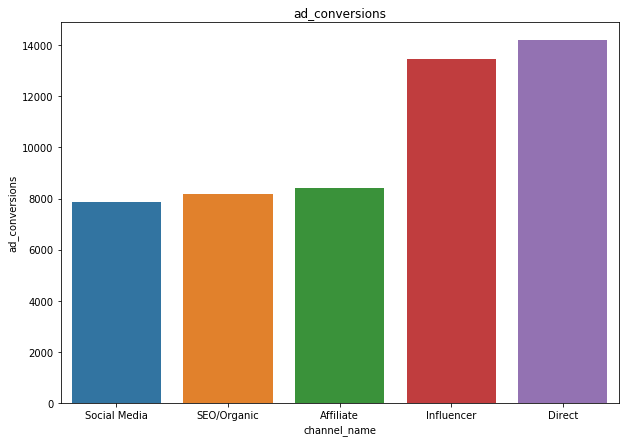

AxesSubplot(0.125,0.125;0.775x0.755)


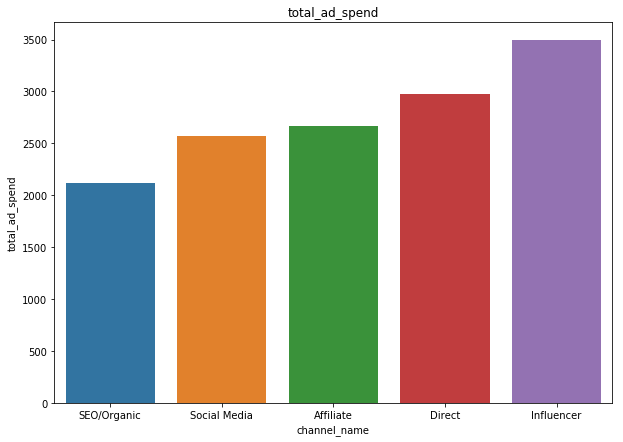

AxesSubplot(0.125,0.125;0.775x0.755)


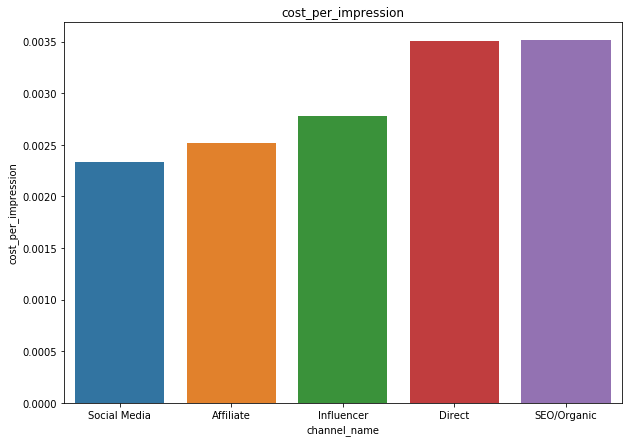

AxesSubplot(0.125,0.125;0.775x0.755)


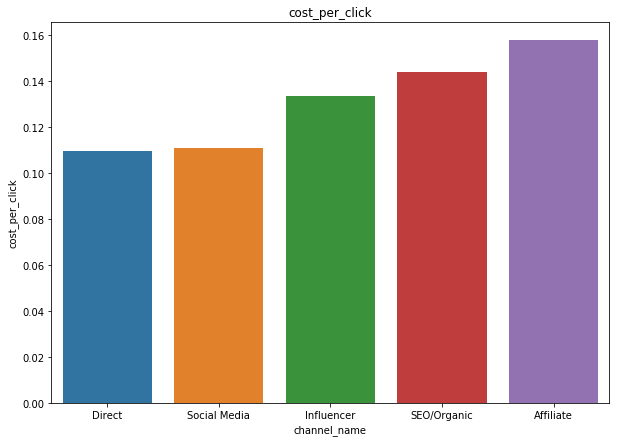

AxesSubplot(0.125,0.125;0.775x0.755)


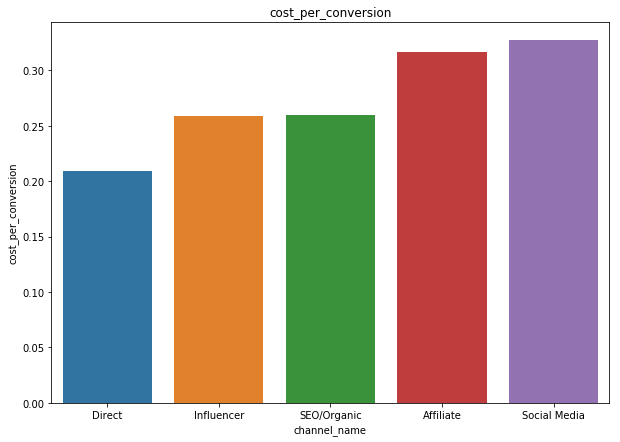

AxesSubplot(0.125,0.125;0.775x0.755)


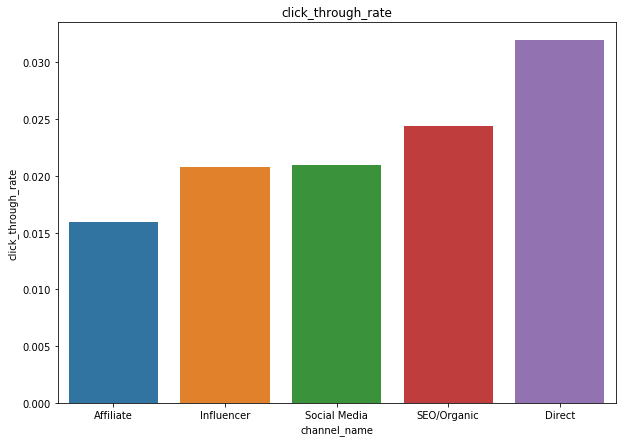

AxesSubplot(0.125,0.125;0.775x0.755)


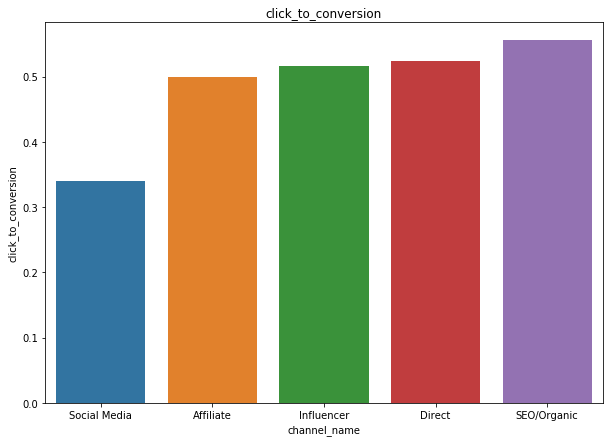

In [147]:
for i in cols:
    print(sns.barplot(x = 'channel_name', y = i, data = channel.sort_values(i)))
    plt.title(i)
    plt.show()

In [90]:
channel_name = list(df['channel_name'].unique())

In [91]:
countRank = df.groupby(['website_ad_rank', 'channel_name']).count().reset_index()

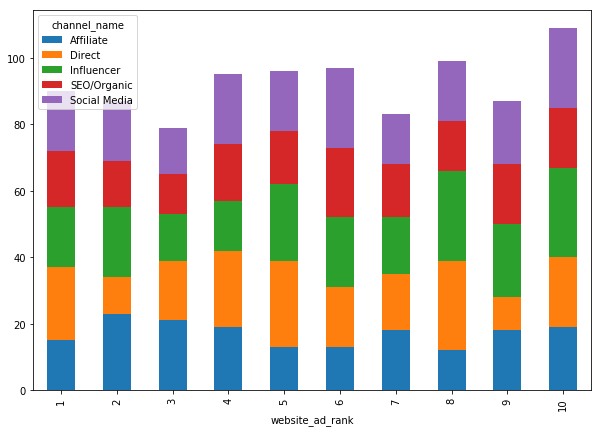

In [92]:
countRank.pivot(index='website_ad_rank', columns='channel_name', values='total_ad_spend').plot.bar(stacked=True)

In [93]:
rankChannel = df.sort_values('website_ad_rank').groupby(['website_ad_rank', 'channel_name']).mean().reset_index()
rankChannel['cost_per_impression'] = rankChannel['total_ad_spend']/rankChannel['ad_impressions']
rankChannel['cost_per_click'] = rankChannel['total_ad_spend']/rankChannel['ad_clicks']
rankChannel['cost_per_conversion'] = rankChannel['total_ad_spend']/rankChannel['ad_conversions']
rankChannel['click_through_rate'] = rankChannel['ad_clicks']/rankChannel['ad_impressions']
rankChannel['click_to_conversion'] = rankChannel['ad_conversions']/rankChannel['ad_clicks']

AxesSubplot(0.125,0.125;0.775x0.755)


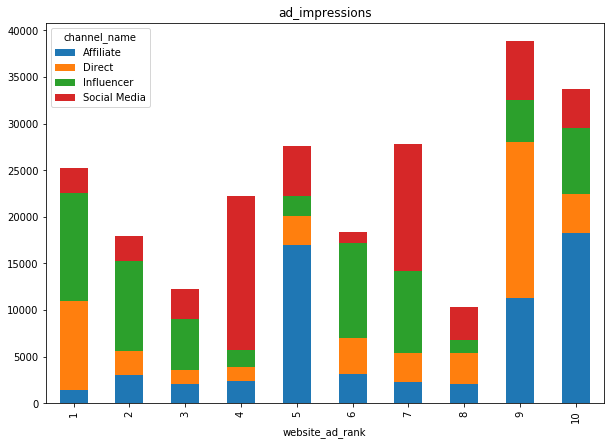

AxesSubplot(0.125,0.125;0.775x0.755)


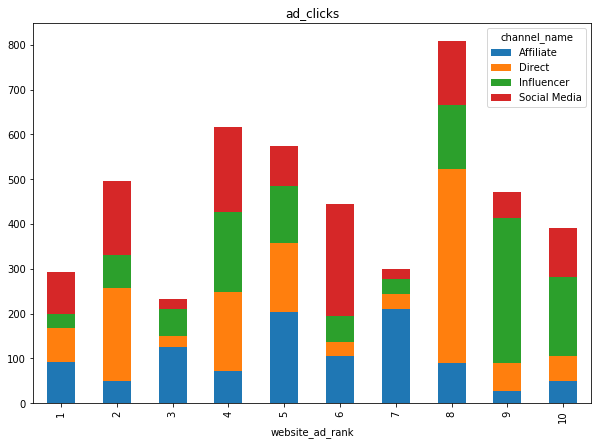

AxesSubplot(0.125,0.125;0.775x0.755)


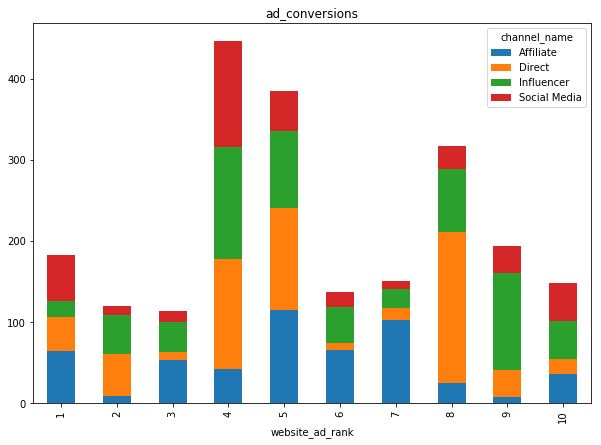

AxesSubplot(0.125,0.125;0.775x0.755)


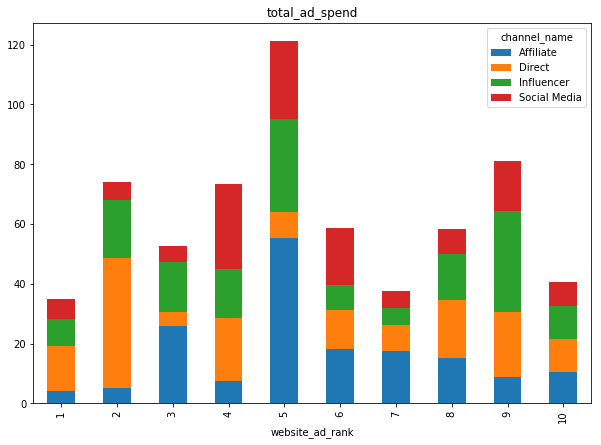

AxesSubplot(0.125,0.125;0.775x0.755)


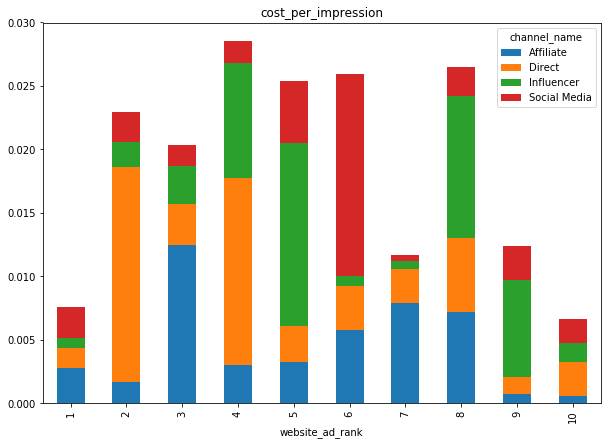

AxesSubplot(0.125,0.125;0.775x0.755)


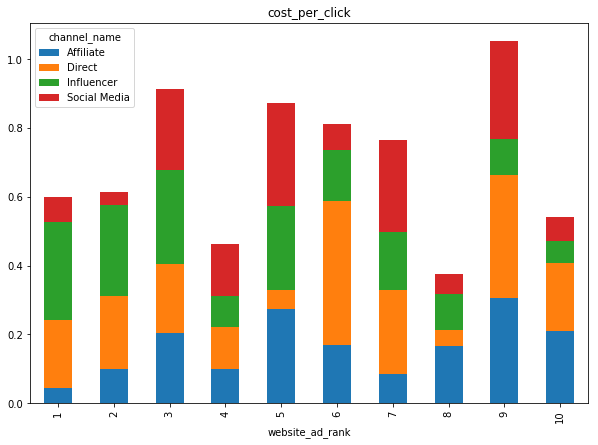

AxesSubplot(0.125,0.125;0.775x0.755)


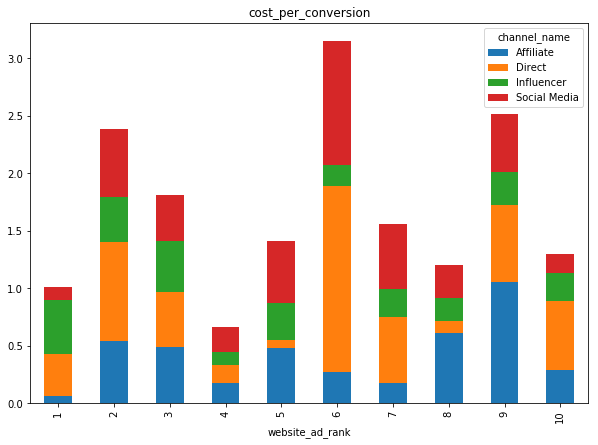

AxesSubplot(0.125,0.125;0.775x0.755)


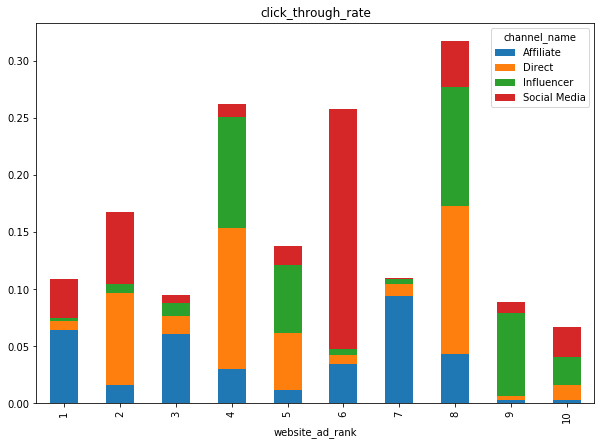

AxesSubplot(0.125,0.125;0.775x0.755)


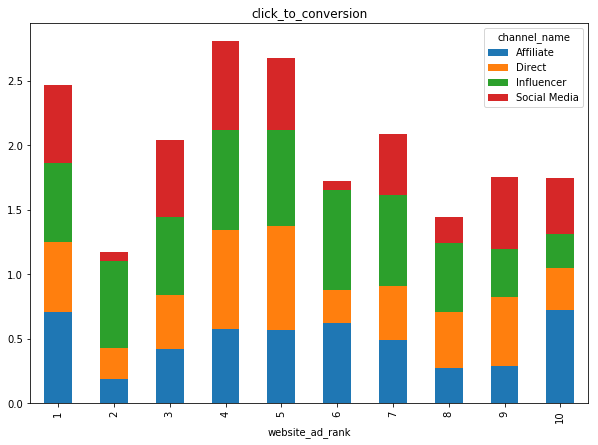

In [94]:
for i in cols:
    rankChannel = rankChannel[rankChannel['channel_name'] != 'SEO/Organic']
    print((rankChannel.pivot(index='website_ad_rank', columns='channel_name', values=i)).plot.bar(stacked=True))
    plt.title(i)
    plt.show()

### What do we want to see

In [105]:
ad = df.groupby('advertiser_name').sum().reset_index()
ad['cost_per_impressions'] = ad['total_ad_spend']/ad['ad_impressions']
ad['cost_per_click'] = ad['total_ad_spend']/ad['ad_clicks']
ad['cost_per_conversion'] = ad['total_ad_spend']/ad['ad_conversions']
ad['click_through_rate'] = ad['ad_clicks']/ad['ad_impressions']
ad['click_to_conversion'] = ad['ad_conversions']/ad['ad_clicks']

In [148]:
ad['cost_per_conversion'].mean()

0.3589243214640853

Text(0.5,1,'Cost per Conversion')

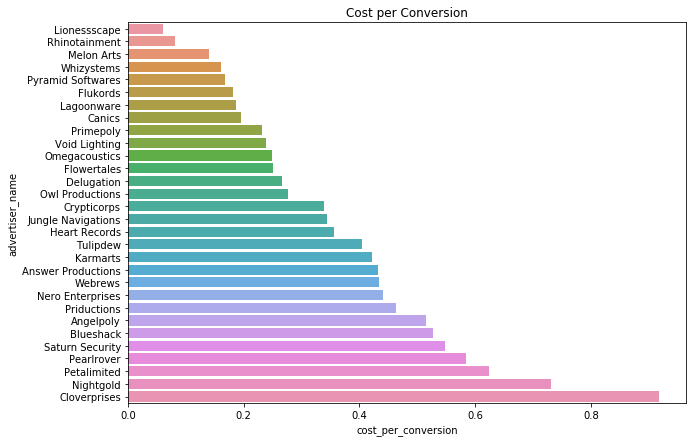

In [107]:
sns.barplot(y = 'advertiser_name', x = 'cost_per_conversion', data =  ad.sort_values('cost_per_conversion'))
plt.title('Cost per Conversion')


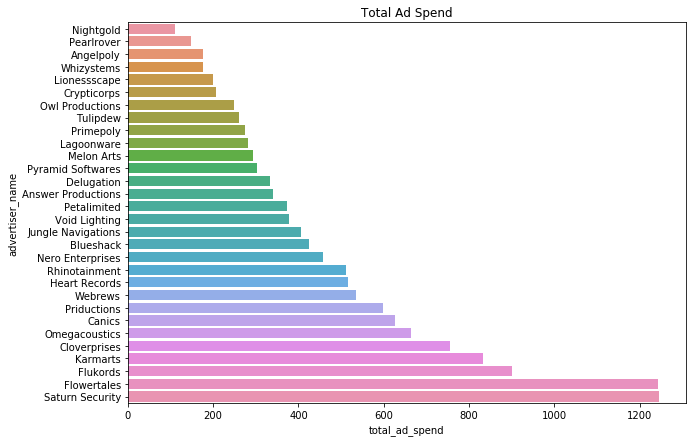

In [108]:
sns.barplot(y = 'advertiser_name', x = 'total_ad_spend', data =  ad.sort_values('total_ad_spend'))
plt.title('Total Ad Spend')
plt.show()


In [110]:
night = df[df['advertiser_name'] == 'Nightgold']
nightChannel = night.groupby('channel_name').sum()
nightChannel['cost_per_conversion'] = nightChannel['total_ad_spend']/nightChannel['ad_conversions']
nightChannel

,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,cost_per_conversion
channel_name,,,,,,,,,
Affiliate,32,1,4,18,26299,218,34,43.67,1.284412
Direct,56,2,4,34,9870,99,71,28.75,0.404930
Influencer,36,0,5,29,6910,64,28,31.93,1.140357
SEO/Organic,41,0,3,22,2226,30,15,5.73,0.382000
Social Media,37,0,3,25,532,10,4,1.02,0.255000


In [127]:
(43.67+28.75+31.93+5.73+1.02)/(34+71+241+15+4)

0.3043835616438356

In [111]:
channel

,channel_name,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,cost_per_impression,cost_per_click,cost_per_conversion,click_through_rate,click_to_conversion
0,Affiliate,1115,34,119,917,1057424,16883,8424,2664.21,0.002520,0.157804,0.316264,0.015966,0.498963
1,Direct,1385,36,127,1063,848205,27089,14187,2972.38,0.003504,0.109726,0.209514,0.031937,0.523718
2,Influencer,1408,46,131,1206,1255256,26097,13479,3490.64,0.002781,0.133756,0.258969,0.020790,0.516496
3,SEO/Organic,1107,27,116,929,602868,14699,8161,2116.44,0.003511,0.143985,0.259336,0.024382,0.555208
4,Social Media,1291,41,129,1074,1104815,23164,7878,2574.78,0.002331,0.111154,0.326832,0.020966,0.340097


In [112]:
# looking at influencer 
influencer = df[df['channel_name'] == 'Influencer']
influencer = influencer.groupby('website_ad_rank').sum()
influencer['cost_per_conversion'] = influencer['total_ad_spend']/influencer['ad_conversions']
influencer.sort_values('cost_per_conversion')

,fiscal_week,retailer_name_on_ad,brand_name_on_ad,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,cost_per_conversion
website_ad_rank,,,,,,,,
4,97,6,8,27334,2676,2063,247.69,0.120063
6,163,5,15,215175,1230,951,179.71,0.188970
8,186,8,20,37184,3894,2086,416.80,0.199808
10,185,6,16,192598,4747,1253,300.09,0.239497
7,113,2,10,149569,555,392,93.94,0.239643
9,173,4,13,97087,7118,2647,743.46,0.280869
5,158,4,15,49372,2929,2187,711.07,0.325135
2,153,4,11,202672,1523,1029,403.00,0.391642
3,91,3,10,76395,856,522,231.99,0.444425


In [113]:
night[night['channel_name'] == 'Influencer']

,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,channel_name,advertiser_name
0,3,0,1,6,56,3,0,0.28,Influencer,Nightgold
1,1,0,0,2,3045,16,13,1.67,Influencer,Nightgold
2,1,0,1,1,3381,13,5,13.00,Influencer,Nightgold
3,9,0,1,2,50,6,0,0.45,Influencer,Nightgold
4,1,0,0,7,7,1,0,1.00,Influencer,Nightgold
5,13,0,1,5,308,18,4,13.20,Influencer,Nightgold
6,8,0,1,6,63,7,6,2.33,Influencer,Nightgold


In [101]:
saturn = df[df['advertiser_name'] == 'Saturn Security']
saturnChannel = saturn.groupby('channel_name').sum()
saturnChannel['cost_per_conversion'] = saturnChannel['total_ad_spend']/saturnChannel['ad_conversions']
saturnChannel

,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,cost_per_conversion
channel_name,,,,,,,,,
Affiliate,29,0,3,32,4865,622,208,30.27,0.145529
Direct,65,2,6,52,198995,1007,546,281.40,0.515385
Influencer,55,1,4,36,51632,99,59,18.14,0.307458
SEO/Organic,24,1,3,22,13682,1010,783,297.86,0.380409
Social Media,18,1,2,14,30226,5463,681,618.27,0.907885


In [102]:
channel

,channel_name,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,cost_per_impression,cost_per_click,cost_per_conversion,click_through_rate,click_to_conversion
0,Affiliate,1115,34,119,917,1057424,16883,8424,2664.21,0.002520,0.157804,0.316264,0.015966,0.498963
1,Direct,1385,36,127,1063,848205,27089,14187,2972.38,0.003504,0.109726,0.209514,0.031937,0.523718
2,Influencer,1408,46,131,1206,1255256,26097,13479,3490.64,0.002781,0.133756,0.258969,0.020790,0.516496
3,SEO/Organic,1107,27,116,929,602868,14699,8161,2116.44,0.003511,0.143985,0.259336,0.024382,0.555208
4,Social Media,1291,41,129,1074,1104815,23164,7878,2574.78,0.002331,0.111154,0.326832,0.020966,0.340097


In [72]:
social = df[df['channel_name'] =='Social Media']
socialRank = social.groupby('website_ad_rank').sum()
socialRank['cost_per_conversion'] = socialRank['total_ad_spend']/socialRank['ad_conversions']
socialRank.sort_values('cost_per_conversion')

,fiscal_week,retailer_name_on_ad,brand_name_on_ad,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,cost_per_conversion
website_ad_rank,,,,,,,,
1,155,6,12,49875,1691,1030,122.50,0.118932
10,147,6,18,101500,2604,1120,187.30,0.167232
4,129,5,15,346185,3973,2750,593.44,0.215796
8,117,3,13,64260,2570,515,147.90,0.287184
3,103,5,10,45455,318,189,75.09,0.397302
9,131,3,11,121233,1127,630,320.51,0.508746
5,130,2,13,96516,1571,877,473.13,0.539487
7,97,4,8,204022,333,156,88.53,0.567500
2,128,3,12,47188,2983,188,111.26,0.591809


In [73]:
saturnSocial = saturn[saturn['channel_name'] == 'Social Media']
saturnSocial['cost_per_conversion'] = saturnSocial['total_ad_spend']/saturnSocial['ad_conversions']
saturnSocial

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,fiscal_week,retailer_name_on_ad,brand_name_on_ad,website_ad_rank,ad_impressions,ad_clicks,ad_conversions,total_ad_spend,channel_name,advertiser_name,cost_per_conversion
868,3,0,1,5,11585,787,578,192.53,Social Media,Saturn Security,0.333097
869,9,0,0,3,1806,62,53,34.95,Social Media,Saturn Security,0.659434
870,6,1,1,6,16835,4614,50,390.79,Social Media,Saturn Security,7.815800


In [196]:
channelRetailer = df.groupby(['channel_name','retailer_name_on_ad']).mean().reset_index()
channelRetailer = df.groupby('website_ad_rank').sum().reset_index()
channelRetailer['cost_per_impression'] = channelRetailer['total_ad_spend']/channelRetailer['ad_impressions']
channelRetailer['cost_per_click'] = channelRetailer['total_ad_spend']/channelRetailer['ad_clicks']
channelRetailer['cost_per_conversion'] = channelRetailer['total_ad_spend']/channelRetailer['ad_conversions']
channelRetailer['click_through_rate'] = channelRetailer['ad_clicks']/channelRetailer['ad_impressions']
channelRetailer['click_to_conversion'] = channelRetailer['ad_conversions']/channelRetailer['ad_clicks']

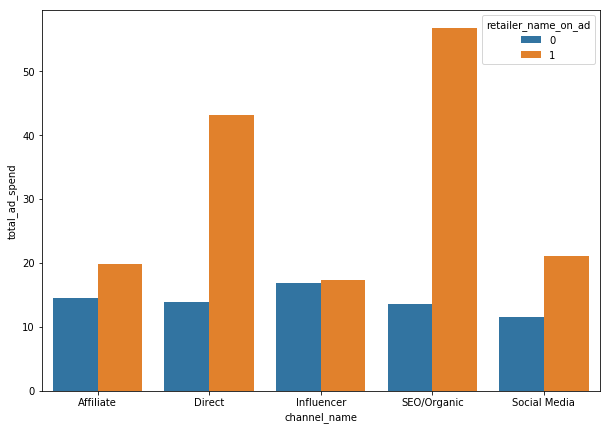

In [197]:
sns.barplot(x="channel_name", y="total_ad_spend", hue="retailer_name_on_ad",data=channelRetailer)

In [198]:
channelBrand = df.groupby(['channel_name','brand_name_on_ad']).mean().reset_index()

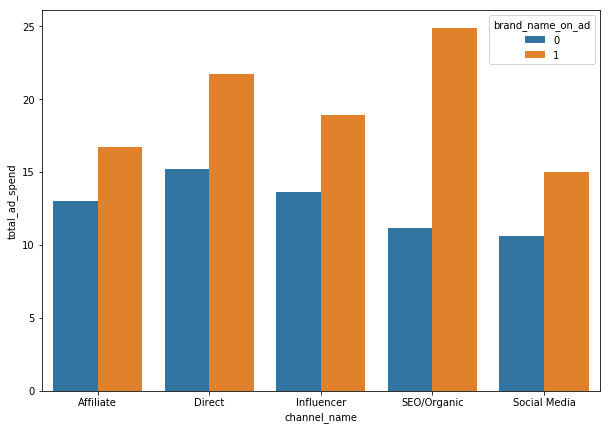

In [199]:
sns.barplot(x="channel_name", y="total_ad_spend", hue="brand_name_on_ad", data=channelBrand)

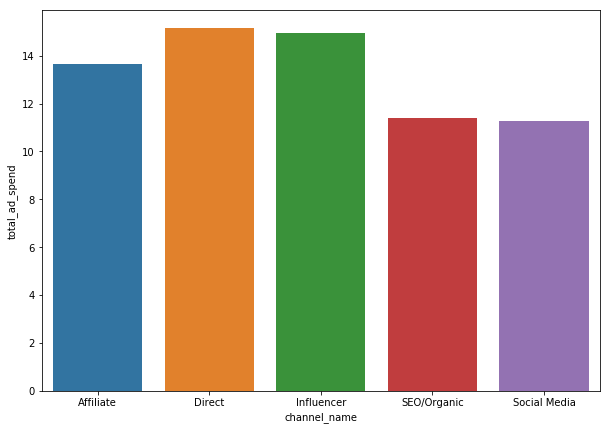

In [200]:
br00 = df[(df['brand_name_on_ad'] == 0) & (df['retailer_name_on_ad'] == 0)]
br00 = br00.groupby('channel_name').mean().reset_index()
sns.barplot(x="channel_name", y="total_ad_spend", data=br00)

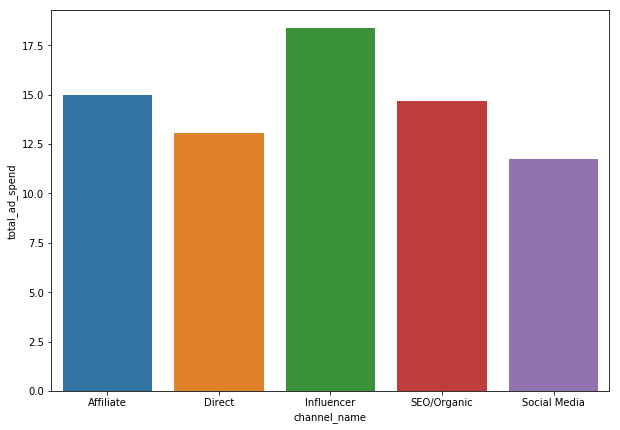

In [201]:
br10 = df[(df['brand_name_on_ad'] == 1) & (df['retailer_name_on_ad'] == 0)]
br10 = br10.groupby('channel_name').mean().reset_index()
sns.barplot(x="channel_name", y="total_ad_spend", data=br10)

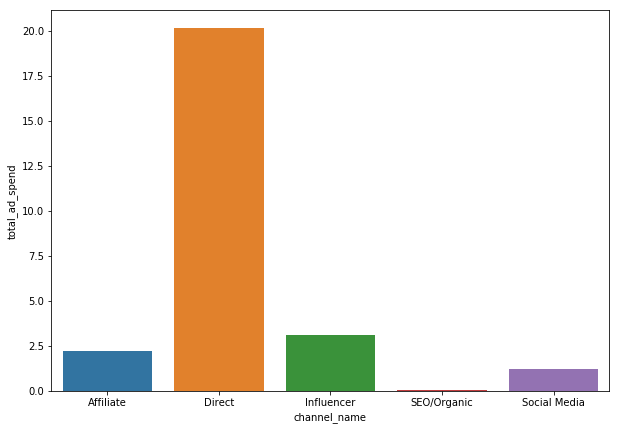

In [202]:
br01 = df[(df['brand_name_on_ad'] == 0) & (df['retailer_name_on_ad'] == 1)]
br01 = br01.groupby('channel_name').mean().reset_index()
sns.barplot(x="channel_name", y="total_ad_spend", data=br01)

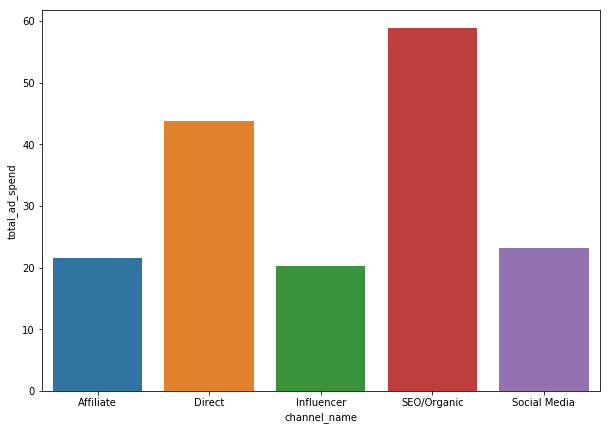

In [203]:
br11 = df[(df['brand_name_on_ad'] == 1) & (df['retailer_name_on_ad'] == 1)]
br11 = br11.groupby('channel_name').mean().reset_index()
sns.barplot(x="channel_name", y="total_ad_spend", data=br11)

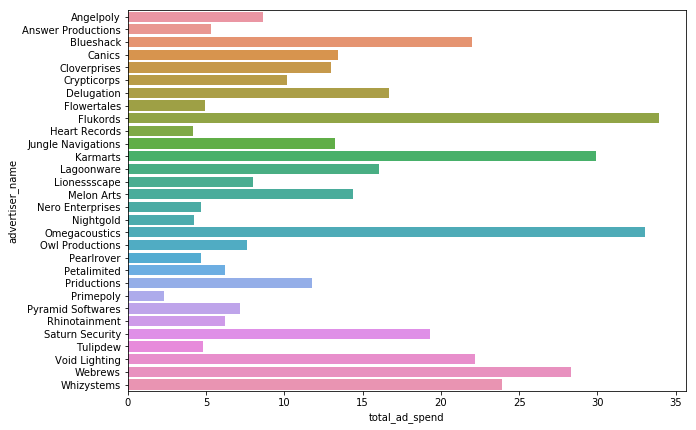

In [204]:
br00 = df[(df['brand_name_on_ad'] == 0) & (df['retailer_name_on_ad'] == 0)]
br00 = br00.groupby('advertiser_name').mean().reset_index()
sns.barplot(y="advertiser_name", x="total_ad_spend", data=br00)

In [205]:
rank = df.groupby('website_ad_rank').mean().reset_index()

In [206]:
rank['cost_per_impression'] = rank['ad_impressions']/rank['total_ad_spend']

In [207]:
rank = rank.sort_values('ad_impressions')

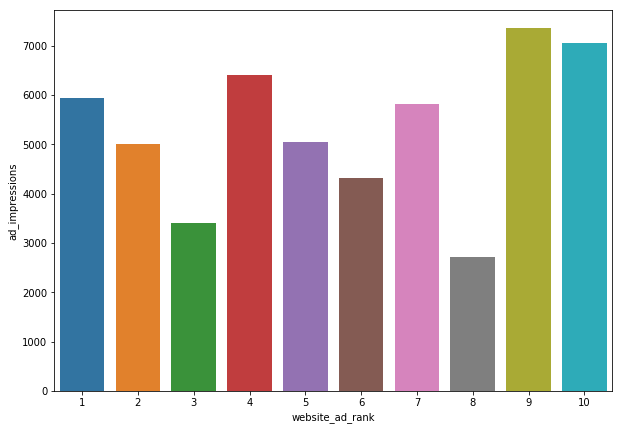

In [208]:
sns.barplot(x = rank['website_ad_rank'], y= rank['ad_impressions'])

In [223]:
weekName = df.groupby(['fiscal_week','channel_name']).sum().reset_index()

In [224]:
weekName['impression_per_cost'] = weekName['ad_impressions']/weekName['total_ad_spend']
weekName['click_per_cost'] = weekName['ad_clicks']/weekName['total_ad_spend']
weekName['conversions_per_cost'] = weekName['ad_conversions']/weekName['total_ad_spend']
weekName['click_through_rate'] = weekName['ad_clicks']/weekName['ad_impressions']
weekName['click_to_conversion'] = weekName['ad_conversions']/weekName['ad_clicks']

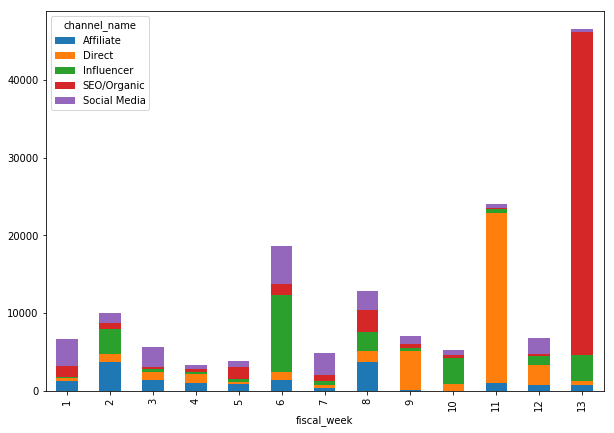

In [225]:
pivot_df = weekName.pivot(index='fiscal_week', columns='channel_name', values='ad_clicks')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.plot.bar(stacked=True)